<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/Campus_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras import optimizers

In [0]:
url = 'drive/My Drive/datasets/Placement_Data_Full_Class.csv'
data = pd.read_csv(url)

In [3]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [0]:
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

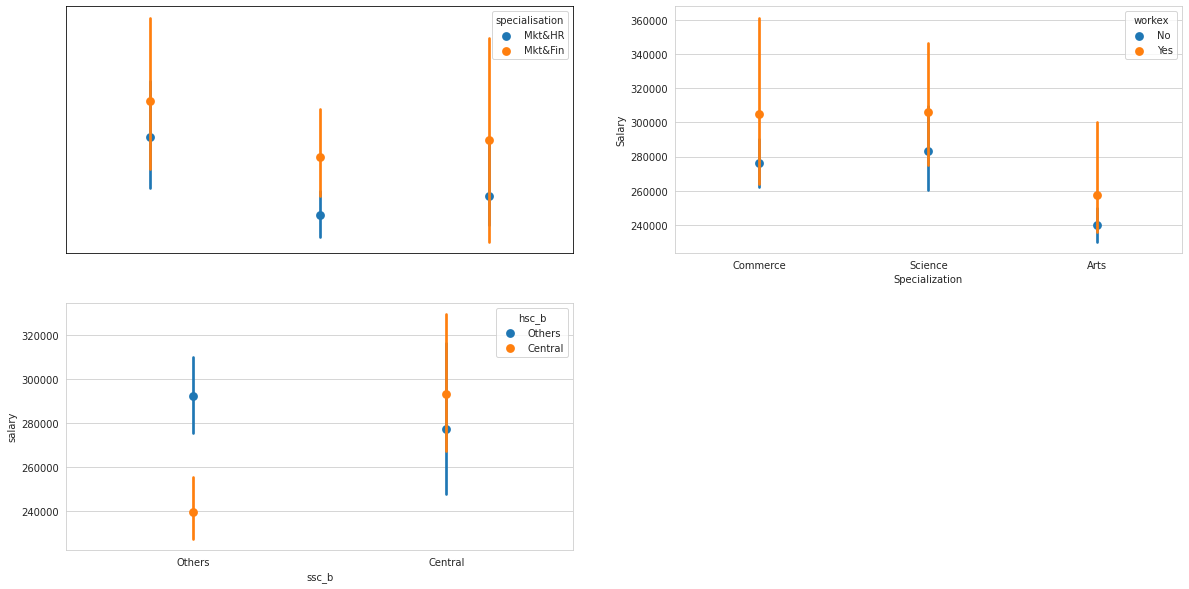

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.set_style('whitegrid')
sns.pointplot(x='degree_t',y='salary',data=data,hue='specialisation',join=False)
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.subplot(222)
sns.pointplot(x='hsc_s',y='salary',data=data,hue='workex',join=False)
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.subplot(223)
sns.pointplot(x='ssc_b',y='salary',data=data,hue='hsc_b',join=False)

Text(0, 0.5, 'salary')

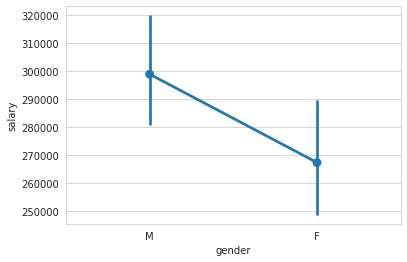

In [6]:
sns.pointplot(x='gender',y='salary',data=data)
plt.xlabel('gender')
plt.ylabel('salary')

In [0]:
numdata = data.loc[:,['ssc_p','degree_p','etest_p']]
sns.pairplot(numdata)
plt.show()

In [0]:
categorical_data = data.loc[:,['gender','ssc_b','hsc_b','degree_t','workex','specialisation']]
categorical_data_ohe = pd.get_dummies(categorical_data)                     

In [9]:
categorical_data_ohe

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,1,0,1,0,1,0,0,1,1,0,0,1
1,0,1,1,0,0,1,0,0,1,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,0,1,0
3,0,1,1,0,1,0,0,0,1,1,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,0,1,1,0,0,1,0,1,0
211,0,1,0,1,0,1,0,0,1,1,0,1,0
212,0,1,0,1,0,1,1,0,0,0,1,1,0
213,1,0,0,1,0,1,1,0,0,1,0,0,1


In [0]:
categorical_data_ohe = np.array(categorical_data_ohe)
numdata = np.array(numdata)

transform = MinMaxScaler()
numdata_trans = transform.fit_transform(numdata)

X_data = np.c_[categorical_data_ohe,numdata_trans]

In [0]:
y_data = np.array(data['status'])

In [0]:
data_stated = data[data.status=='Placed']

In [0]:
numdata_stated = data_stated.loc[:,['ssc_p','degree_p','etest_p']]
categorical_data_stated = data_stated.loc[:,['gender','ssc_b','hsc_b','degree_t','workex','specialisation']]

In [0]:
categorical_data_stated_ohe = pd.get_dummies(categorical_data_stated)
categorical_data_stated_ohe = np.array(categorical_data_stated_ohe)
numdata_stated = np.array(numdata_stated)

transform = MinMaxScaler()
numdata_stated_trans = transform.fit_transform(numdata_stated)

X_data_stated = np.c_[categorical_data_stated_ohe,numdata_stated_trans]
y_data_stated = np.array(data_stated['salary'])

In [87]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [0]:
for i in range(len(y_data)):
  if y_data[i] == 'Placed':
    y_data[i] = 1
  else:
    y_data[i] = 0

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2)

In [0]:
network = models.Sequential()
network.add(layers.Dense(128,activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [0]:
def k_fold_validation(network,X_data,y_data,k=3,epochs=100):
  num_val_samples = len(X_data)//k
  all_scores = []
  for i in range(k):
    print('### Fold',i,'###')
    val_data = X_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = y_data[i * num_val_samples: (i+1) * num_val_samples]

    partial_X_data = np.concatenate([
                                     X_data[:i * num_val_samples],
                                     X_data[(i+1) * num_val_samples:]
    ], axis=0)
    partial_y_data = np.concatenate([
                                     y_data[:i * num_val_samples],
                                     y_data[(i+1) * num_val_samples:]
    ], axis=0)
    
    history = network.fit(partial_X_data,partial_y_data,
                validation_data = (val_data,val_targets),
                epochs=epochs,batch_size=1,verbose=0)
    all_scores.append(history.history['val_loss'])
  for i in all_scores:
    print(i)

In [44]:
k_fold_validation(network,X_train,y_train)

### Fold 0 ###
### Fold 1 ###
### Fold 2 ###


In [0]:
def compare_graph_bar(network,X_test,y_test):
  y_pred = network.predict(X_test).flatten()
  real = []
  pred = []
  index = []
  for i in range(min(100,len(X_test))):
    index.append(i)
    real.append(y_test[i])
    pred.append(y_pred[i])
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.bar(index,real,label='Test value')
  plt.legend(loc='center left',fontsize=12)
  plt.subplot(122)
  plt.bar(index,pred,label='Pred value')
  plt.legend(loc='center left',fontsize=12)
  plt.show()

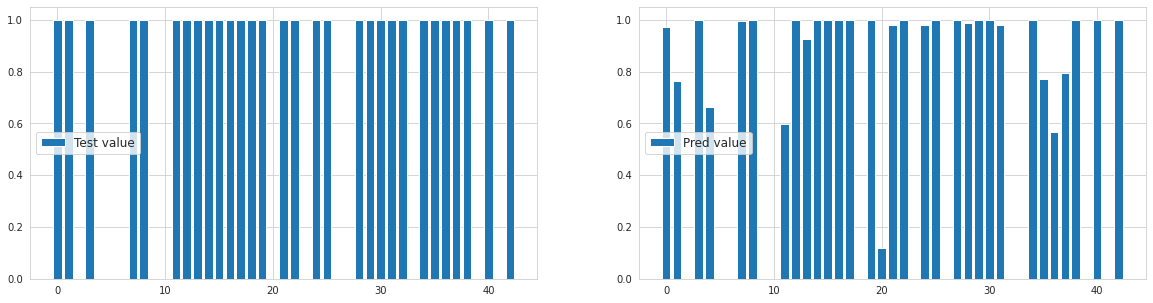

In [60]:
compare_graph(network,X_test,y_test)

In [0]:
for i in range(len(y_data_stated)):
  y_data_stated[i] /= 100000.

In [0]:
stated_train, stated_test, salary_train, salary_test = train_test_split(X_data_stated,y_data_stated,test_size=0.2)

In [0]:
network2 = models.Sequential()
network2.add(layers.Dense(128,activation='relu'))
network2.add(layers.Dense(64,activation='relu'))
network2.add(layers.Dense(1))

network2.compile(optimizer=optimizers.Nadam(),
                loss='mean_squared_error',)

In [0]:
network2.fit(stated_train,salary_train,epochs=1000)

In [0]:
def compare_graph(network,X_test,y_test):
  y_pred = network.predict(X_test).flatten()
  real = []
  pred = []
  index = []
  for i in range(min(100,len(X_test))):
    index.append(i)
    real.append(y_test[i])
    pred.append(y_pred[i])
  plt.figure(figsize=(10,5))
  plt.plot(index,real,'b-',label='Real Price')
  plt.plot(index,pred,'r--',label='Pred price')
  plt.legend(loc='center left',fontsize=12)
  plt.show()

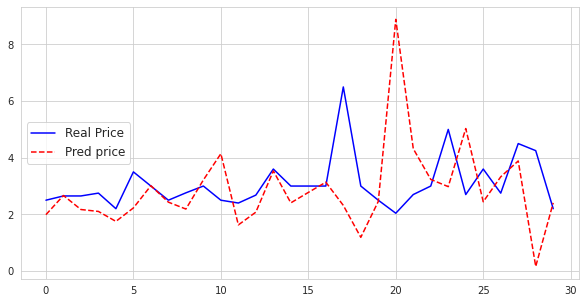

In [110]:
compare_graph(network2,stated_test,salary_test)